***Introduction***

**Ini adalah database Data hujan harian selama 10 tahun terakhir di Australia.** 

Database ini memiliki 23 atribut: *(`Date`, `Location`, `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustDir`, `WindGustSpeed`, `WindDir9am`, `WindDir3pm`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Preessure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am`, `Temp3pm`, `RainToday`, dan `RainTomorrow`)*

Pada kolom *`RainTomorrow`* adalah **variabel target yang akan di prediksi**.

Attribute Information:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

>***Import Pustaka***
>>Disini saya akan menggunakan labrari yang saya hanya gunakan sendiri

In [1]:
import pandas as pd
import numpy as np

>***Data Loading***
>>Tahaap ini saya akan meload data saya

In [2]:
df=pd.read_csv('weatherAUS.csv')
df.shape

(145460, 23)

In [3]:
pd.set_option('display.max_columns', 23)
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Terdapat beberapa *Value `NAN` (nilai yang hilang) dari dataset Data Hujan. Tahap selanjutnya akan membersihkan data yang nilainya hilang

>***Data Cleansing***
>>Tahap ini dataset memiliki `23` kolom dan `145.460` baris akan dibersikan 

In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Terdapat sejumlah *`343.248`* baris yang bernilai *`NA` value*.
>*Dikarenakan jumlah nilai yang `NA` atau nilai yang hilang teralalu banyak, menjadikan datanya tidak seimbang. Pada tahap ini  kita akan mengisi value yang hilang dan datanya.*

In [5]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

C:\Users\Thendro\AppData\Local\Temp\ipykernel_916\4158371001.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

**Setelah data dibersihkan beberapa dataset kolom diatas, dataset tersebut masih memiliki nilai yang kurang seperti kolom: *`WinGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday`, dan `RainTomorrow`*.**

Kita akan mengisi dataset kolom menggunakan fungsi *`mode()` dari Pandas.*

In [6]:
df.WindGustDir.fillna(df.WindGustDir.mode()[0],inplace=True)
df.WindDir9am.fillna(df.WindDir9am.mode()[0],inplace=True)
df.WindDir3pm.fillna(df.WindDir3pm.mode()[0],inplace=True)
df.RainToday.fillna(df.RainToday.mode()[0],inplace=True)

#df.RainTomorrow.fillna(df.RainTomorrow.mode()[0],inplace=True)

df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

***Terlihat dataset masih memiliki value atau nilai yang hilang pada kolom yang akan diprediksi `RainTommorow`. Tahap ini kita akan menghapus beberapa nilai yang hilang menggunakan perintah `dropna()`.*** Dan melihat kondisi jumlah nilai dari kolom *`RainTomorrow`*.

In [7]:
df.dropna(axis=0,inplace=True)
df.shape

(142193, 23)

In [8]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Kondisi diatas disebut ***unbalance*** dataset. **Kita akan mengelola Datanya sudah digunakan data tinggal diexplore dan digunakan untuk Prediksi.**

>***Eksplorasi Data***
>>Tahap ini Data akan diolah dan dipersentasikan menggunakan *Library dari Matplotlib dan Seaborn*

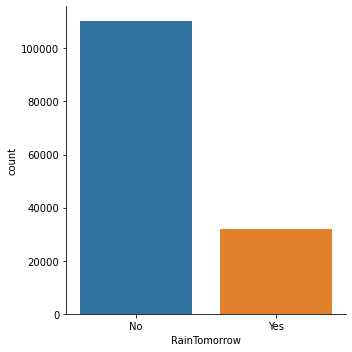

In [9]:
import seaborn as sns

sns.catplot(x = 'RainTomorrow', kind='count', data = df)

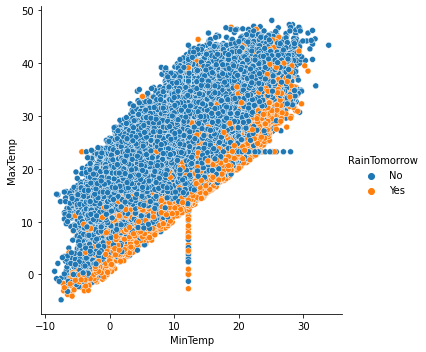

In [11]:
sns.relplot(x='MinTemp', y='MaxTemp', hue = 'RainTomorrow', data = df)

In [49]:
obs=len(df)
data0=len(df.loc[df['RainTomorrow'] ==0])
data1=len(df.loc[df['RainTomorrow'] ==1])
print("Jumlah data besok Hujan: {0} ({1:2.2f}%)".format(data1, (data1/obs) * 100))
print("Jumlah data besok tidak Hujan: {0} ({1:2.2f}%)".format(data0, (data0/obs) * 100))

Jumlah data besok Hujan: 31877 (22.42%)
Jumlah data besok tidak Hujan: 110316 (77.58%)


Gambar jumlah data tidak turun hujan lebih banyak dari pada data kolom *`RainTomorrow`*. Mengakibatkan kondisi dataset menjadi ***Unbalance***.

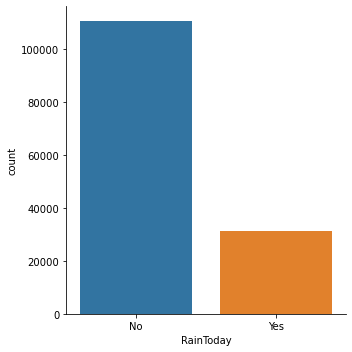

In [10]:
sns.catplot(x = 'RainToday', kind = 'count', data = df)

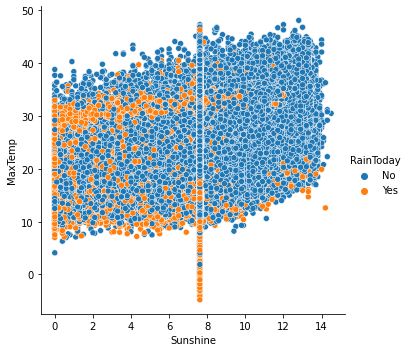

In [12]:
sns.relplot(x = 'Sunshine', y ='MaxTemp', hue = 'RainToday', data = df)

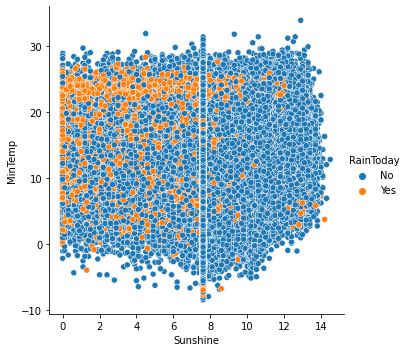

In [13]:
sns.relplot(x = 'Sunshine', y = 'MinTemp', hue = 'RainToday', data = df)

Berikut juga terjadi data *Unbalance* pada kolom *`RainToday`*.

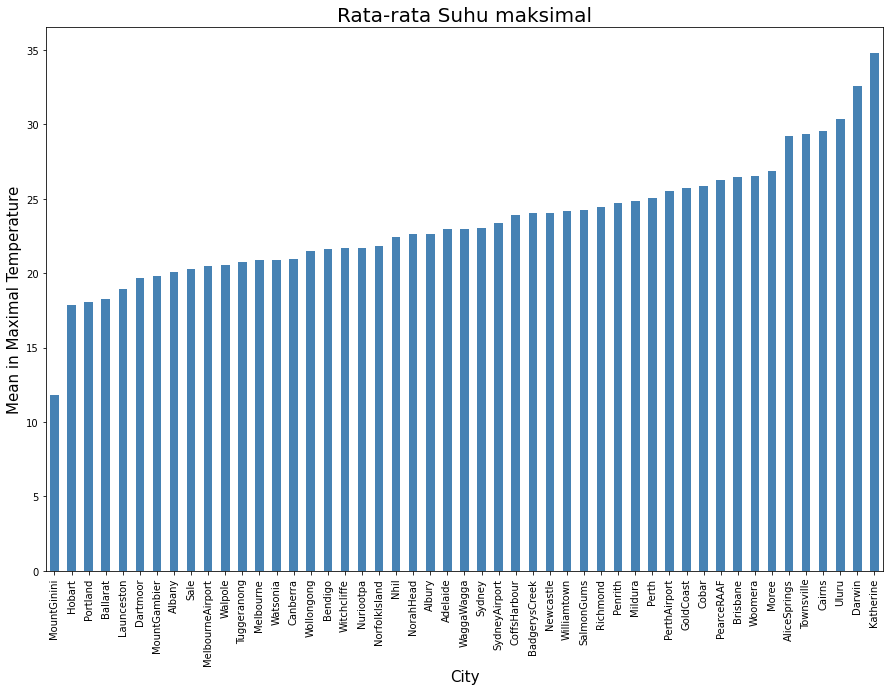

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

city = df['MaxTemp'].groupby(df['Location'], axis=0).mean().sort_values()

city.plot(kind='bar', figsize=(15,10), color = 'steelblue')
plt.title('Rata-rata Suhu maksimal', fontsize=20)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Mean in Maximal Temperature', fontsize = 15)
plt.show()

Gambar diatas mempersentasikan log kota atau kolom `Location`, jumlah suhu yang meningkat naik.

# Logistic Regression
DataSet 'Rain in Australia' yang digunakan terlihat tidak seimbang atau *Unbalance*, Oleh karena itu kita akan menggunakan Logistic Regression untuk mencari hubungan keterikatan input dengan probabilitas hasil Output.

Disini kita akan yang melakukan pendekatan untuk mempredikasi kolom *`RainTomorrow`* atau kolom *apakah besok akan hujan atau tidak*.

In [16]:
data_lr=df
data_lr.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,5.468232,7.611178,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447461,4.50993,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,5.468232,7.611178,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.50993,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,5.468232,7.611178,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447461,4.50993,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,5.468232,7.611178,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,4.447461,4.50993,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,5.468232,7.611178,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,4.447461,4.50993,20.1,28.2,Yes,No


selanjutnya kita akan memisahkan data yang akan digunakan dalam pelatihan model.

>***Data Preprocessing***
>>Tahap ini data akan disiapkan untuk proses pelatihan model algoritma Logistic Regression

In [17]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data_lr["RainTomorrow"]  = LE.fit_transform(df["RainTomorrow"])

X = data_lr.drop(['Date', 'Humidity9am', 'Humidity3pm', 'RainToday',
                 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', ], axis=1)
y = data_lr['RainTomorrow']

data_lr.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,0
5,2008-12-06,Albury,14.6,29.7,0.2,5.468232,7.611178,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447461,4.50993,20.6,28.9,No,0
6,2008-12-07,Albury,14.3,25.0,0.0,5.468232,7.611178,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.50993,18.1,24.6,No,0
7,2008-12-08,Albury,7.7,26.7,0.0,5.468232,7.611178,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447461,4.50993,16.3,25.5,No,0
8,2008-12-09,Albury,9.7,31.9,0.0,5.468232,7.611178,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,4.447461,4.50993,18.3,30.2,No,1
9,2008-12-10,Albury,13.1,30.1,1.4,5.468232,7.611178,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,4.447461,4.50993,20.1,28.2,Yes,0


>*Split Data*
>>Tahap ini data akan displit 70% data untuk training dan 30% untuk Testing data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

>***Pelatihan Model***
>>Tahap ini Data yang sudah dipisah dan dibagi dalam split data, data tersetbut akan dilatih

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

LogReg= LogisticRegression().fit(X_train, y_train)
y_pred= LogReg.predict(X_test)

C:\Users\Thendro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>***Evaluasi Model***
>>Tahap data yang sudah dilatih akan dilakukan evaluasi model untuk menunjukkan
 performa model berdasarkan metrics yang dipilih.

In [20]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative: {tn}')
print(f'False Positive: {fp}') 
print(f'False Negative: {fn}') 
print(f'True Positive: {tp}')

True Negative: 21227
False Positive: 840
False Negative: 1493
True Positive: 4879


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     22067
           1       0.85      0.77      0.81      6372

    accuracy                           0.92     28439
   macro avg       0.89      0.86      0.88     28439
weighted avg       0.92      0.92      0.92     28439



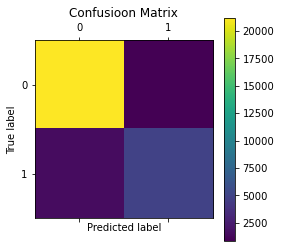

In [24]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusioon Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8070465635596725

>***Kesimpulan***
>>Dataset Rain in Australia tidak cocok untuk Logistic Regression, dikarenakan dataset yang digunakan Unbalace/tidak seimbang *(memiliki jumlah value yang hilang `NA` value terlalalu banyak dari data aslinya yang terlalu sedikit)* menghasilkan nilai persentasi accuracy score yang tidak tepat digunakan maka untuk mengatasinya kita menggunakan metrik F1-score.


# SVM (Support Vector Machine)
SVM akan melakukan pendekatan pada DataSet 'Rain in Australia' yang terlihat tidak seimbang. Yang pada kasus sebelumnya Logistic Regresion melakukan pendekatan dan hasil yang dihasilkan tidak maksimal.

Disini juga kita akan yang mempredikasi kolom *`RainTomorrow`* atau kolom *apakah besok akan hujan atau tidak*.

In [37]:
data_svm=df
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
5,2008-12-06,2,14.6,29.7,0.2,5.468232,7.611178,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447461,4.50993,20.6,28.9,0,0
6,2008-12-07,2,14.3,25.0,0.0,5.468232,7.611178,13,50.0,12,13,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.50993,18.1,24.6,0,0
7,2008-12-08,2,7.7,26.7,0.0,5.468232,7.611178,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447461,4.50993,16.3,25.5,0,0
8,2008-12-09,2,9.7,31.9,0.0,5.468232,7.611178,6,80.0,9,7,7.0,28.0,42.0,9.0,1008.9,1003.6,4.447461,4.50993,18.3,30.2,0,1
9,2008-12-10,2,13.1,30.1,1.4,5.468232,7.611178,13,28.0,8,10,15.0,11.0,58.0,27.0,1007.0,1005.7,4.447461,4.50993,20.1,28.2,1,0


>***Data Preprocessing***
>>Tahap ini data akan disiapkan data untuk proses pelatihan model.

Terlihat pada sample data diatas, ada beberapa nilai kolom yang bersifat caterogical.

In [38]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data_svm["Location"]=LE.fit_transform(data_svm["Location"])
LE = LabelEncoder()
data_svm["WindGustDir"]=LE.fit_transform(data_svm["WindGustDir"])
LE = LabelEncoder()
data_svm["WindDir9am"]=LE.fit_transform(data_svm["WindDir9am"])
LE = LabelEncoder()
data_svm["WindDir3pm"]=LE.fit_transform(data_svm["WindDir3pm"])
LE = LabelEncoder()
data_svm["RainToday"]=LE.fit_transform(data_svm["RainToday"])

In [39]:
LE = LabelEncoder()
data_lr["RainTomorrow"]  = LE.fit_transform(df["RainTomorrow"])
data_lr.head()

X = data_svm.drop(['Date'], axis=1)
y = data_svm['RainTomorrow']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


>*Split Data*
>>Tahap ini data akan displit sebanyak 70% data untuk training model dan 30% untuk Testing data

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,random_state=109)

>***Pelatihan Model***
>>Tahap ini Data yang sudah dipisah dan dibagi dalam split data, data tersetbut akan dilatih

In [41]:
from sklearn.svm import SVC
model_svm=SVC().fit(X_train, y_train)
y_pred= model_svm.predict(X_test)

>***Evaluasi Model***
>>Tahap data yang sudah dilatih akan dilakukan evaluasi model untuk menunjukkan
 performa model berdasarkan metrics yang dipilih.

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8342163251910545

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     33055
           1       0.78      0.37      0.50      9603

    accuracy                           0.83     42658
   macro avg       0.81      0.67      0.70     42658
weighted avg       0.83      0.83      0.81     42658



>***Kesimpulan***
>>Dataset Rain in Australia memiliki ketepatan yang cukup karena persentasi nilai *accuracy score* yang dihasilkan sampai *`83%`*.